<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/02-clustering/Clustering_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To appreicate the bells and whistles of hierarchical clustering, it is best to first play with some synthetic data. Let's create some 2D data.

## Let's create some data

In [ ]:
import pandas as pd
import random
import numpy as np

Cluster 1

In [ ]:
# Some parameters to control the cluster
points =50
mu_x = 0
sigma_x = 0.1
mu_y = 0
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

df = pd.DataFrame({'x': x, 'y': y})

Let's create another cluster

<Axes: xlabel='x', ylabel='y'>

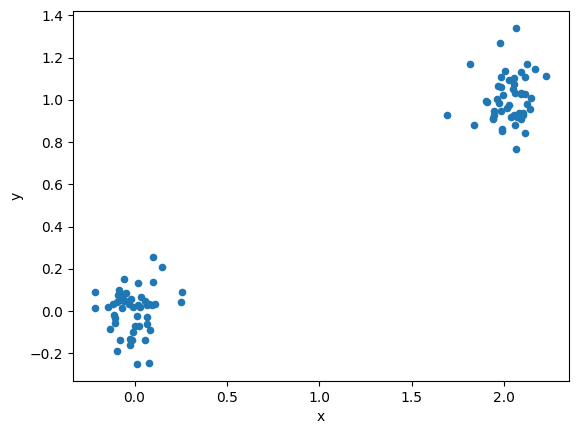

In [ ]:
points = 50
mu_x = 2
sigma_x = 0.1
mu_y = 1
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

temp_df = pd.DataFrame({'x': x, 'y': y})
df = pd.concat([df, temp_df], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

Always a good idea to put the parameters of interest in their own cell.

In [ ]:
num_clusters = 2
method = 'single'

First calculate the proximity matrix

In [ ]:
Z = linkage(df, method) # 'ward' 'complete' 'single' 'average' centroid,

Z

array([[6.30000000e+01, 9.00000000e+01, 3.31621576e-03, 2.00000000e+00],
       [5.30000000e+01, 6.90000000e+01, 3.38765070e-03, 2.00000000e+00],
       [5.90000000e+01, 6.40000000e+01, 6.84910546e-03, 2.00000000e+00],
       [7.90000000e+01, 8.50000000e+01, 6.92418213e-03, 2.00000000e+00],
       [1.50000000e+01, 2.20000000e+01, 8.93881661e-03, 2.00000000e+00],
       [7.00000000e+01, 8.00000000e+01, 9.12062367e-03, 2.00000000e+00],
       [2.40000000e+01, 4.70000000e+01, 1.06545384e-02, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 1.21853567e-02, 2.00000000e+00],
       [1.70000000e+01, 1.90000000e+01, 1.26272523e-02, 2.00000000e+00],
       [6.80000000e+01, 8.40000000e+01, 1.33287927e-02, 2.00000000e+00],
       [6.20000000e+01, 7.40000000e+01, 1.33734375e-02, 2.00000000e+00],
       [4.10000000e+01, 1.04000000e+02, 1.35498875e-02, 3.00000000e+00],
       [1.10000000e+01, 3.10000000e+01, 1.53448921e-02, 2.00000000e+00],
       [8.60000000e+01, 1.00000000e+02, 1.56936017e

Now, do the clustering based on the proximity matrix.

In [ ]:
df['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

Plot the clustering

<Axes: xlabel='x', ylabel='y'>

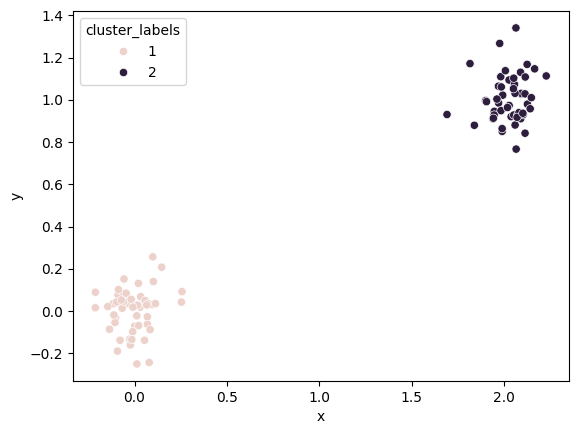

In [ ]:
sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df)

Plot the dendrogram

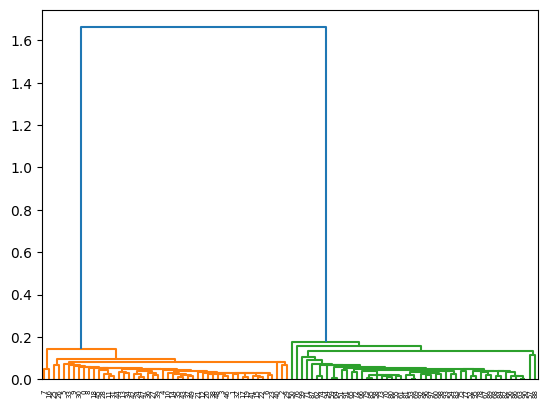

In [ ]:
from scipy.cluster.hierarchy import dendrogram

_ = dendrogram(Z)

## Cluster Analysis - Kmeans

Let's compare the hierarchial clustering result with k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_kmeans = df.drop('cluster_labels', axis=1)

In [ ]:
df_kmeans

,x,y
0,-0.057324,0.151651
1,-0.089372,0.076406
2,0.098794,0.256679
3,0.029954,0.018259
4,0.011935,-0.022594
...,...,...
45,1.985418,1.060945
46,2.056710,1.073158
47,2.051031,1.052595
48,2.052695,1.102413


Define the number of clusters

In [ ]:
num_clusters = 2

Find the cluster centroids

In [ ]:
# Generate cluster centers and labels
kmeans_result = KMeans(num_clusters,init='random').fit(df_kmeans[['x', 'y']])  #, init = [[2, 1 ],[0, 0]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans_result.cluster_centers_

array([[-0.00720907,  0.00231841],
       [ 2.02778124,  1.00409823]])

Assign each point to its cluster

In [ ]:
df_kmeans['cluster_labels'] = kmeans_result.labels_

Plot the clustering

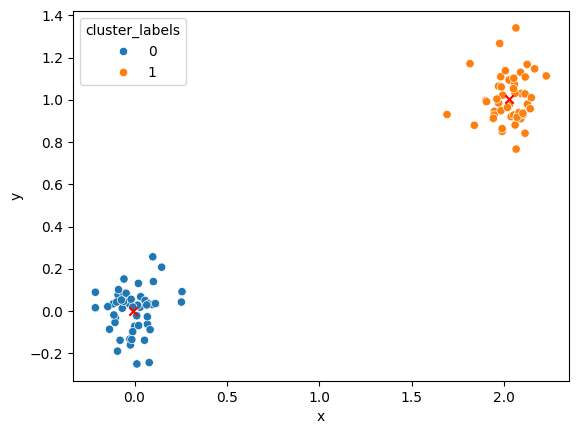

In [ ]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df_kmeans)

#plot centroids
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], color='red', marker='x')

# Show the plot with the new points
plt.show()

## Let's try 3D data

Let's create some 3D data and use it for k-means using ` np.random.multivariate_normal`

In [ ]:
import numpy as np

# First distribution
# Mean and covariance
mean = [0, 0, 0]
covariance = np.diag([1,2,1]) #np.eye(3)

# Generating random samples
num_samples = 100
samples = np.random.multivariate_normal(mean, covariance, num_samples)

In [ ]:
# Second distribution
# Mean and covariance
mean = [3, 3, 3]
covariance = np.diag([2,1,1])

# Generating random samples
num_samples = 2000
samples2 = np.random.multivariate_normal(mean, covariance, num_samples)

In [ ]:
# Third distribution
# Mean and covariance
mean = [5, 5, 5]
covariance = np.diag([0.5,1,0.5])

# Generating random samples
num_samples = 150
samples3 = np.random.multivariate_normal(mean, covariance, num_samples)

Let's put all samples together in a dataframe

In [ ]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [ ]:
df_3d

,x,y,z
0,2.782925,-1.126937,-0.717593
1,-0.293290,-0.042318,0.983066
2,0.409809,0.665410,-0.968989
3,-0.155744,0.469158,-0.588515
4,-1.124116,-0.990212,0.892401
...,...,...,...
145,4.174804,5.287980,5.879466
146,5.043586,4.969536,4.484947
147,4.771989,6.304414,6.491254
148,6.045981,6.988393,6.163632


Let's plot it: https://plotly.com/python/3d-scatter-plots/

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [ ]:
Z = linkage(df_3d, 'ward') #Try different ones.
df_3d['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

In [ ]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [ ]:
kmeans_result = KMeans(3,init='random').fit(df_3d[['x', 'y', 'z']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_3d['cluster_labels'] = kmeans_result.labels_
df_3d

,x,y,z,cluster_labels
0,2.782925,-1.126937,-0.717593,1
1,-0.293290,-0.042318,0.983066,1
2,0.409809,0.665410,-0.968989,1
3,-0.155744,0.469158,-0.588515,1
4,-1.124116,-0.990212,0.892401,1
...,...,...,...,...
145,4.174804,5.287980,5.879466,0
146,5.043586,4.969536,4.484947,0
147,4.771989,6.304414,6.491254,0
148,6.045981,6.988393,6.163632,0


In [ ]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's add the centroids

In [ ]:
df_centroids = pd.DataFrame(kmeans_result.cluster_centers_, columns=['x', 'y', 'z'])

In [ ]:
import plotly.graph_objects as go
centroid_plot = go.Scatter3d(
    x=df_centroids['x'],
    y=df_centroids['y'],
    z=df_centroids['z'],
    name='centroids',
    mode='markers',
    marker_symbol='x',
    marker_color ='green',
    marker_size = 4
)

fig.add_trace(centroid_plot)

##Things we could try:


1.   What if we make the data non-Gaussian?
2.   Trying different densities, sizes, number of clusters, initialization, etc.
